In [9]:
import dlib
import cv2
import numpy as np

# 提供路径
predictor_model = r"C:\Users\zouxu\OneDrive\Desktop\p poker\sum sprint\6_2\shape_predictor_68_face_landmarks.dat"
file_name = r"C:\Users\zouxu\OneDrive\Desktop\p poker\sum sprint\6_1\1.jpg"

# 创建一个HOG人脸检测器
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)

# 加载图片
image = cv2.imread(file_name)

# 运行HOG人脸检测器
detected_faces = face_detector(image, 1)

print("Found {} faces in the image file {}".format(len(detected_faces), file_name))


Found 1 faces in the image file C:\Users\zouxu\OneDrive\Desktop\p poker\sum sprint\6_1\1.jpg


In [11]:
# 人脸对齐函数
def align_face(image, landmarks):
    desired_left_eye = (0.35, 0.35)
    desired_face_width = 256
    desired_face_height = 256

    left_eye_pts = landmarks[36:42]
    right_eye_pts = landmarks[42:48]

    left_eye_center = np.mean(left_eye_pts, axis=0).astype("int")
    right_eye_center = np.mean(right_eye_pts, axis=0).astype("int")

    dY = right_eye_center[1] - left_eye_center[1]
    dX = right_eye_center[0] - left_eye_center[0]

    angle = np.degrees(np.arctan2(dY, dX)) - 180

    desired_right_eye_x = 1.0 - desired_left_eye[0]

    dist = np.sqrt((dX ** 2) + (dY ** 2))
    desired_dist = (desired_right_eye_x - desired_left_eye[0])
    desired_dist *= desired_face_width
    scale = desired_dist / dist

    eyes_center = (int((left_eye_center[0] + right_eye_center[0]) // 2),
                   int((left_eye_center[1] + right_eye_center[1]) // 2))

    M = cv2.getRotationMatrix2D(eyes_center, angle, scale)
    tX = desired_face_width * 0.5
    tY = desired_face_height * desired_left_eye[1]
    M[0, 2] += (tX - eyes_center[0])
    M[1, 2] += (tY - eyes_center[1])

    (w, h) = (desired_face_width, desired_face_height)
    output = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC)

    return output, M

In [12]:
def show_image(title, image):
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [14]:
import matplotlib.pyplot as plt

- Face #0 found at Left: 204 Top: 376 Right: 589 Bottom: 761


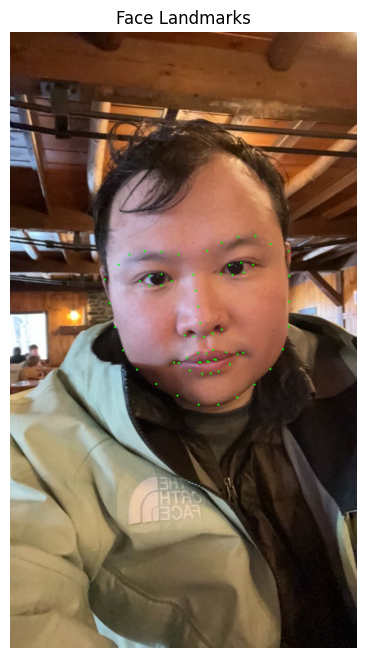

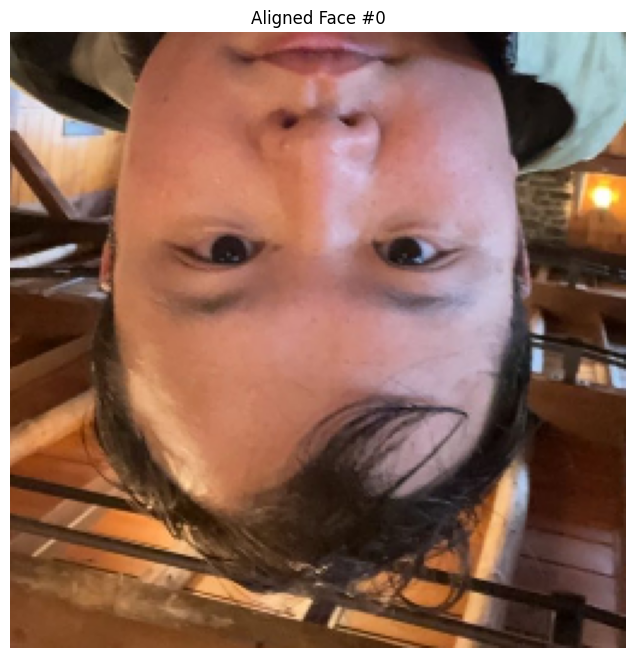

In [15]:
for i, face_rect in enumerate(detected_faces):
    # 检测到的脸部返回为包含上、左、右、下边界坐标的对象
    print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

    # 获取脸部姿势
    pose_landmarks = face_pose_predictor(image, face_rect)
    landmarks = np.array([[p.x, p.y] for p in pose_landmarks.parts()])

    # 显示原始图像和标记的人脸位置
    image_with_landmarks = image.copy()
    for (x, y) in landmarks:
        cv2.circle(image_with_landmarks, (x, y), 2, (0, 255, 0), -1)
    show_image("Face Landmarks", image_with_landmarks)

    # 对齐人脸
    aligned_face, M = align_face(image, landmarks)

    # 显示对齐后的图像
    show_image("Aligned Face #{}".format(i), aligned_face)

    # 保存对齐后的图像到文件
    cv2.imwrite("aligned_face_{}.jpg".format(i), aligned_face)